# NCI Dream Gene Copy Number Data Import

Gene copy number data import for NCI DREAM drug sensitivity challenge.

Source data README: /Users/eczech/.synapseCache/452/756452/DREAM7_DrugSensitivity1_SNP6_README.txt

In [1]:
%run -m ipy_startup
%matplotlib inline
from mgds.data_aggregation import database as db
from mgds.data_aggregation import source as src
from mgds.data_aggregation.import_lib import nci_dream
from mgds.data_aggregation import excel_utils
from py_utils import assertion_utils
from py_utils.collection_utils import subset

In [57]:
file_path = nci_dream.get_file('SNP6_gene_level.txt')
d = pd.read_csv(file_path, sep='\t')

# At TOW, this data had no "Excel Dates" as gene ids so make sure that remains true
assert not np.any(excel_utils.is_excel_date(d['HGNC_ID']))

d.head()

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
0,403263,OR4G11P,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
1,79501,OR4F5,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
2,645543,LOC645543,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
3,653340,LOC653340,-0.046,0.27,0.112,0.332,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446
4,643670,LOC643670,-0.046,0.27,0.112,0.005,-0.136,-0.692,-0.023,-0.108,...,-0.243,0.018,-0.151,0.057,-0.056,0.2,0.099,-0.278,-0.527,-0.446


In [58]:
d[d['HGNC_ID'].str.upper().str.contains('RG9MTD1')]

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
18824,131909,Rg9mtd1,-0.032,0.036,0.04,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019
18825,54931,RG9MTD1,-0.032,0.036,0.04,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019


## Resolve Multiple Records for HGNC ID

#### Scenario 1: Multiple EntrezID for same HGNCID

In [59]:
cts = d.groupby('HGNC_ID')['EntrezID'].nunique()
cts[cts > 1]

HGNC_ID
CRSP8    2
DUB3     2
PRG2     2
SKIP     2
Name: EntrezID, dtype: int64

In [60]:
d[d['HGNC_ID'].isin(cts[cts > 1].index.values)].sort_values('HGNC_ID')

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
21223,441089,CRSP8,-0.059,-0.330,-0.263,-0.001,-0.185,-0.206,-0.318,0.144,...,-0.187,0.036,0.381,-0.051,0.024,-0.300,0.044,0.059,-0.047,0.028
27090,9442,CRSP8,-0.046,-0.035,-0.098,0.003,-0.163,0.434,0.767,0.184,...,-0.232,0.020,0.166,-0.147,0.091,-0.054,0.297,-0.296,-0.006,0.024
19697,402164,DUB3,-0.044,0.005,0.108,0.003,-0.076,-0.240,-0.223,0.148,...,-0.151,-0.112,0.130,-0.056,-0.238,-0.136,-0.313,-0.318,-0.012,0.029
25179,377630,DUB3,-0.062,-0.553,-0.532,0.007,-0.578,-0.870,-0.332,-0.443,...,-0.241,0.001,-0.391,-0.996,-0.331,-0.746,-0.308,-0.299,-0.066,0.011
4658,5553,PRG2,-0.035,-0.356,-0.277,0.396,0.113,-0.196,0.148,-0.158,...,0.521,-0.016,-0.123,0.153,-0.356,0.194,0.326,0.074,-0.458,-0.383
12802,79948,PRG2,-0.060,-0.004,0.035,0.007,-0.497,-0.205,-0.160,-0.445,...,-0.148,0.002,-0.156,-0.347,0.097,-0.393,-0.290,-0.258,-0.130,-0.354
10912,51763,SKIP,-0.058,0.203,0.050,-0.021,-0.166,0.165,-0.163,-0.362,...,0.164,-0.556,-0.150,-0.366,-0.318,-0.154,-0.307,-0.811,-0.427,-0.358
16088,80309,SKIP,-0.531,0.006,-0.237,0.006,-0.187,-0.235,-0.153,-0.164,...,-0.194,-0.029,-0.116,0.011,0.037,0.212,-0.305,-0.287,-0.047,-0.369


In [61]:
# Arbitrarily remove some records with the same HGNC ID but different Entrez IDs
entrez_id_rm = [9442, 377630, 79948, 80309]
n_before = len(d)
d = subset(d, lambda df: df[~df['EntrezID'].isin(entrez_id_rm)], subset_op='Remove multiple records for HGNC ID')
assert len(d) == n_before - len(entrez_id_rm), 'Filter removed incorrect number of records'

[Remove multiple records for HGNC ID] Records before = 27234, Records after = 27230, Records removed = 4 (%0.01)


#### Scenario 2: HGNC case-insensitive duplicates

In [62]:
cts = d['HGNC_ID'].str.upper().value_counts()
cts[cts > 1]

RGR        2
RG9MTD1    2
Name: HGNC_ID, dtype: int64

In [63]:
d_dup = d[d['HGNC_ID'].str.upper().isin(cts[cts > 1].index.values)]
d_dup

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
3412,5995,RGR,-0.036,-0.319,-0.241,0.014,-0.588,-0.868,-0.017,-0.159,...,-0.258,0.033,0.331,-0.162,-0.330,-0.122,0.322,0.080,0.103,0.996
17629,266747,Rgr,-0.045,-0.322,-0.189,-0.034,-0.113,-0.207,-0.163,0.639,...,-0.148,0.004,-0.190,0.187,-0.163,-0.315,-0.295,-0.316,0.377,0.080
18824,131909,Rg9mtd1,-0.032,0.036,0.040,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019
18825,54931,RG9MTD1,-0.032,0.036,0.040,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019


In [64]:
# For each of the above, the Entrez IDs were used to find the current "Approved" HGNC symbol.  It seems
# like some of these may have been outdated symbols.

# RGR: http://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:9990
# Rgr: http://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:31911
i = d[d['EntrezID'] == 266747].index.values
d = d.set_value(i[0], 'HGNC_ID', 'RGL4')

# Rg9mtd1: http://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:34336
i = d[d['EntrezID'] == 131909].index.values
d = d.set_value(i[0], 'HGNC_ID', 'FAM172BP')

# RG9MTD1: http://www.genenames.org/cgi-bin/gene_symbol_report?hgnc_id=HGNC:26022
i = d[d['EntrezID'] == 54931].index.values
d = d.set_value(i[0], 'HGNC_ID', 'TRMT10C')

d.loc[d_dup.index]

,EntrezID,HGNC_ID,184B5,21MT1,21NT,600MPE,AU565,BT20,BT474,BT483,...,SUM149PT,SUM159PT,SUM185PE,SUM225CWN,SUM229PE,SUM52PE,T47D,UACC812,ZR751,ZR75B
3412,5995,RGR,-0.036,-0.319,-0.241,0.014,-0.588,-0.868,-0.017,-0.159,...,-0.258,0.033,0.331,-0.162,-0.330,-0.122,0.322,0.080,0.103,0.996
17629,266747,RGL4,-0.045,-0.322,-0.189,-0.034,-0.113,-0.207,-0.163,0.639,...,-0.148,0.004,-0.190,0.187,-0.163,-0.315,-0.295,-0.316,0.377,0.080
18824,131909,FAM172BP,-0.032,0.036,0.040,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019
18825,54931,TRMT10C,-0.032,0.036,0.040,0.008,-0.211,0.422,-0.144,0.164,...,0.219,0.005,-0.176,-0.068,-0.394,0.471,0.044,0.052,-0.034,0.019


## Melt to Long Format

In [65]:
d = d.rename(columns={'HGNC_ID': 'GENE_ID:HGNC', 'EntrezID': 'GENE_ID:ENTREZ'})
id_vars = ['GENE_ID:HGNC', 'GENE_ID:ENTREZ']

# Make sure there is only one row per HGNC + Entrez gene ID combination
assert not np.any(d[id_vars].duplicated())

d = pd.melt(d, id_vars=id_vars, value_name='VALUE', var_name='CELL_LINE_ID')

# Ensure there is now only one record per cell line + gene combo
assert d.groupby(id_vars + ['CELL_LINE_ID']).size().max() == 1

# Remove null values
d = subset(d, lambda df: df[df['VALUE'].notnull()], subset_op='Remove null values for column "VALUE"')

d.head()

[Remove null values for column "VALUE"] Records before = 1279810, Records after = 1278374, Records removed = 1436 (%0.11)


,GENE_ID:HGNC,GENE_ID:ENTREZ,CELL_LINE_ID,VALUE
0,OR4G11P,403263,184B5,-0.046
1,OR4F5,79501,184B5,-0.046
2,LOC645543,645543,184B5,-0.046
3,LOC653340,653340,184B5,-0.046
4,LOC643670,643670,184B5,-0.046


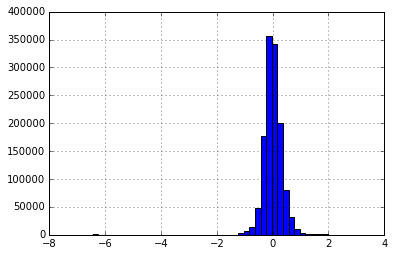

In [66]:
d['VALUE'].hist(bins=50)

In [67]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278374 entries, 0 to 1279809
Data columns (total 4 columns):
GENE_ID:HGNC      1278374 non-null object
GENE_ID:ENTREZ    1278374 non-null int64
CELL_LINE_ID      1278374 non-null object
VALUE             1278374 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.8+ MB


## Export

In [68]:
assertion_utils.assert_object_types(d)
assert np.all(pd.notnull(d))
db.save(d, src.NCIDREAM_v1, db.IMPORT, 'gene-copy-number')

'/Users/eczech/data/research/mgds/import/ncidream_v1_gene-copy-number.pkl'